Chapter 11
# kNN分类
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

from sklearn.naive_bayes import GaussianNB

In [3]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [7]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

x_min, x_max = 4, 8
y_min, y_max = 2, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 40), np.linspace(y_min, y_max, 40))

C:\Users\james\AppData\Local\Temp\ipykernel_3964\1200934379.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
C:\Users\james\AppData\Local\Temp\ipykernel_3964\1200934379.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


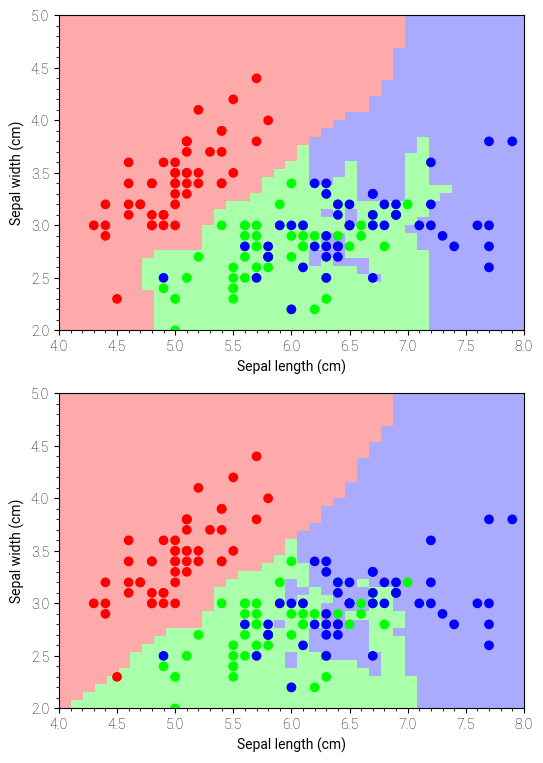

In [9]:
num_neighbors = [2,5]

fig = plt.figure(figsize=(6, 9))

for idx, n_neighbors in enumerate(num_neighbors):
    ax = fig.add_subplot(2, 1, idx + 1)

    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.axis('tight')
    
# fig.savefig('Figures/kNN分类.svg', format='svg')

In [10]:
fig.savefig('kNN分类.svg', format='svg')